In [4]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


In [5]:
# Path of the file to read
suicide_filepath = "data/D_Detection.csv"

# Read the file into a variable flight_data
suicide_data = pd.read_csv(suicide_filepath)
suicide_data.head()

,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [6]:
suicide_data = suicide_data.drop('Unnamed: 0', axis=1)
suicide_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232074 entries, 0 to 232073
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    232074 non-null  object
 1   class   232074 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [7]:
suicide_data['Length'] = suicide_data['text'].apply(lambda x: len(x.split(' ')))
suicide_data = suicide_data[suicide_data.Length<=317]

Text(0.5, 1.0, 'Number of suicides per the dataset')

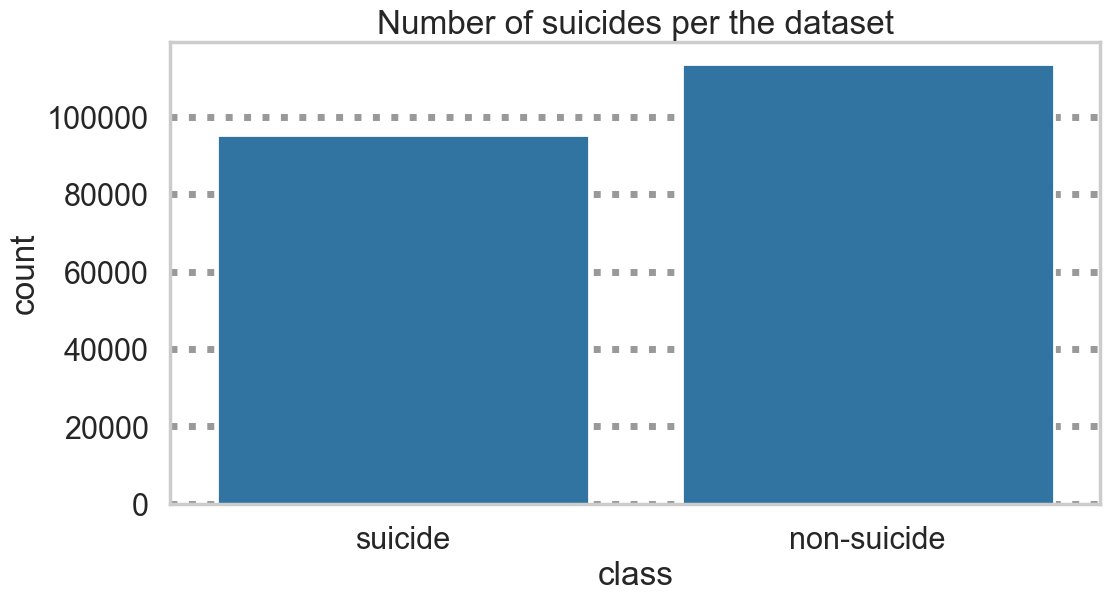

In [8]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("poster", font_scale = 1, rc={"grid.linewidth": 5})
sns.countplot(x = 'class' , data=suicide_data)

plt.title('Number of suicides per the dataset')




In [9]:
Words = list()
for i in suicide_data['text']:
    for j in i.split(' '):
        Words.append(j.upper())
len(Words)

16688702

In [10]:
from collections import Counter
Words_Freq = Counter(Words)
Words_Freq = pd.DataFrame({'Word':list(Words_Freq.keys()),'Frequency':list(Words_Freq.values())})
Words_Freq.sort_values('Frequency',ascending=False,inplace=True)
Words_Freq.head(70)
len(Words_Freq)

428444

In [11]:
Words_Freq = Words_Freq[Words_Freq['Frequency']>Words_Freq['Frequency'].quantile(0.99)]
len(Words_Freq)


4281

In [12]:
Words_Freq = Words_Freq[Words_Freq['Frequency'] < 31905]
Words_Freq.head()

,Word,Frequency
726,SOME,31882
145,ME.,31630
3986,FILLER,31016
1254,WE,30745
11,HAS,29485
